# Initial set-up/Preparation

Step 2 notebook was updated with some fixes, it is resubmitted along with this one.

The data pre-processing bits in this notebook are mostly copied from step 2.

In [951]:
#importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from scipy import stats


In [952]:
#import the data
stock_data = pd.read_csv('./../Stock Market Dataset.csv')
inflation_data = pd.read_csv('./../SeriesReport-20240324235202_f3e23e.csv')

#check the data
stock_data.info()
print()
inflation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1243 non-null   int64  
 1   Date               1243 non-null   object 
 2   Natural_Gas_Price  1243 non-null   float64
 3   Natural_Gas_Vol.   1239 non-null   float64
 4   Crude_oil_Price    1243 non-null   float64
 5   Crude_oil_Vol.     1220 non-null   float64
 6   Copper_Price       1243 non-null   float64
 7   Copper_Vol.        1206 non-null   float64
 8   Bitcoin_Price      1243 non-null   object 
 9   Bitcoin_Vol.       1243 non-null   float64
 10  Platinum_Price     1243 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1243 non-null   object 
 13  Ethereum_Vol.      1243 non-null   float64
 14  S&P_500_Price      1243 non-null   object 
 15  Nasdaq_100_Price   1243 non-null   object 
 16  Nasdaq_100_Vol.    1242 

In [953]:
#corrections to data types

# drop the unnamed column if it exists
if 'Unnamed: 0' in stock_data.columns:
    stock_data = stock_data.drop('Unnamed: 0', axis=1)

# print the columns that are object data types
print(stock_data.dtypes[stock_data.dtypes == 'object'])

#change the object data types to float
stock_data['Bitcoin_Price'] = stock_data['Bitcoin_Price'].str.replace(',', '').astype(float)
stock_data['Platinum_Price'] = stock_data['Platinum_Price'].str.replace(',', '').astype(float)
stock_data['Gold_Price'] = stock_data['Gold_Price'].str.replace(',', '').astype(float)
stock_data['Ethereum_Price'] = stock_data['Ethereum_Price'].str.replace(',', '').astype(float)
stock_data['S&P_500_Price'] = stock_data['S&P_500_Price'].str.replace(',', '').astype(float)
stock_data['Nasdaq_100_Price'] = stock_data['Nasdaq_100_Price'].str.replace(',', '').astype(float)
stock_data['Berkshire_Price'] = stock_data['Berkshire_Price'].str.replace(',', '').astype(float)

stock_data.dtypes

Date                object
Bitcoin_Price       object
Platinum_Price      object
Ethereum_Price      object
S&P_500_Price       object
Nasdaq_100_Price    object
Berkshire_Price     object
Gold_Price          object
dtype: object


Date                  object
Natural_Gas_Price    float64
Natural_Gas_Vol.     float64
Crude_oil_Price      float64
Crude_oil_Vol.       float64
Copper_Price         float64
Copper_Vol.          float64
Bitcoin_Price        float64
Bitcoin_Vol.         float64
Platinum_Price       float64
Platinum_Vol.        float64
Ethereum_Price       float64
Ethereum_Vol.        float64
S&P_500_Price        float64
Nasdaq_100_Price     float64
Nasdaq_100_Vol.      float64
Apple_Price          float64
Apple_Vol.           float64
Tesla_Price          float64
Tesla_Vol.           float64
Microsoft_Price      float64
Microsoft_Vol.       float64
Silver_Price         float64
Silver_Vol.          float64
Google_Price         float64
Google_Vol.          float64
Nvidia_Price         float64
Nvidia_Vol.          float64
Berkshire_Price      float64
Berkshire_Vol.       float64
Netflix_Price        float64
Netflix_Vol.         float64
Amazon_Price         float64
Amazon_Vol.          float64
Meta_Price    

In [954]:
#convert date to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%d-%m-%Y')

#set date as index
stock_data = stock_data.set_index('Date')

In [955]:
#fix inflation data

#drop the last 2 columns
inflation_data = inflation_data.drop(inflation_data.columns[-2:], axis=1)

#change column names to their respective months

inflation_data.columns = ['Year', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

#melt

inflation_data = pd.melt(inflation_data, id_vars='Year', var_name='Month', value_name='Infaltion Rate')

#change month and year to datetime
inflation_data['Month'] = inflation_data['Month'].astype(int)
inflation_data['Year'] = inflation_data['Year'].astype(int)
inflation_data['Month'] = inflation_data['Month'].apply(lambda x: '{0:0>2}'.format(x))
inflation_data['Year'] = inflation_data['Year'].astype(str)
inflation_data['Month'] = inflation_data['Month'].astype(str)
inflation_data['Date'] = inflation_data['Year'] + '-' + inflation_data['Month']
inflation_data['Date'] = pd.to_datetime(inflation_data['Date'])

#sort
inflation_data = inflation_data.sort_values(by=['Year', 'Month'])
inflation_data.drop(['Year', 'Month'], axis=1, inplace=True)

#set date as index
inflation_data = inflation_data.set_index('Date')

inflation_data.head()


,Infaltion Rate
Date,
2014-01-01,1.6
2014-02-01,1.6
2014-03-01,1.7
2014-04-01,1.8
2014-05-01,2.0


In [956]:
# display the percentage of missing values in each column in stock data

missing_values = stock_data.isnull().mean() * 100

missing_values_formatted = missing_values.map(lambda x: f"{x:.2f}%")

missing_values_formatted


Natural_Gas_Price     0.00%
Natural_Gas_Vol.      0.32%
Crude_oil_Price       0.00%
Crude_oil_Vol.        1.85%
Copper_Price          0.00%
Copper_Vol.           2.98%
Bitcoin_Price         0.00%
Bitcoin_Vol.          0.00%
Platinum_Price        0.00%
Platinum_Vol.        48.83%
Ethereum_Price        0.00%
Ethereum_Vol.         0.00%
S&P_500_Price         0.00%
Nasdaq_100_Price      0.00%
Nasdaq_100_Vol.       0.08%
Apple_Price           0.00%
Apple_Vol.            0.00%
Tesla_Price           0.00%
Tesla_Vol.            0.00%
Microsoft_Price       0.00%
Microsoft_Vol.        0.00%
Silver_Price          0.00%
Silver_Vol.           3.78%
Google_Price          0.00%
Google_Vol.           0.00%
Nvidia_Price          0.00%
Nvidia_Vol.           0.00%
Berkshire_Price       0.00%
Berkshire_Vol.        0.00%
Netflix_Price         0.00%
Netflix_Vol.          0.00%
Amazon_Price          0.00%
Amazon_Vol.           0.00%
Meta_Price            0.00%
Meta_Vol.             0.00%
Gold_Price          

In [957]:
stock_data.columns.size
stock_data.columns

Index(['Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price',
       'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price',
       'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.',
       'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.',
       'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.',
       'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.',
       'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.',
       'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price',
       'Gold_Vol.'],
      dtype='object')

In [958]:
# drop all inflation data before 2-2019
inflation_data = inflation_data.loc['2019-02-01':]

#change column name to inflation_rate
inflation_data.columns = ['Inflation_Rate_%']

In [959]:
#change volume columns from scalar value to percentage change, simplifies using volume later

for col in stock_data.columns:
    if 'Vol' in col:
        stock_data[col] = stock_data[col].pct_change().round(4)

In [960]:
#rename volume columns to vol_%

stock_data.columns = stock_data.columns.str.replace('Vol.', 'Vol_%')

/tmp/ipykernel_11668/2515512121.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  stock_data.columns = stock_data.columns.str.replace('Vol.', 'Vol_%')


In [961]:
#resample all columns to monthly based on median
stock_data = stock_data.resample('M').median()

#change date to start of month
stock_data.index = stock_data.index.to_period('M').to_timestamp()

stock_data.head()

,Natural_Gas_Price,Natural_Gas_Vol_%,Crude_oil_Price,Crude_oil_Vol_%,Copper_Price,Copper_Vol_%,Bitcoin_Price,Bitcoin_Vol_%,Platinum_Price,Platinum_Vol_%,...,Berkshire_Price,Berkshire_Vol_%,Netflix_Price,Netflix_Vol_%,Amazon_Price,Amazon_Vol_%,Meta_Price,Meta_Vol_%,Gold_Price,Gold_Vol_%
Date,,,,,,,,,,,,,,,,,,,,,
2019-02-01,2.6620,-0.0278,55.02,0.04000,2.83600,-0.06730,3646.85,0.00340,821.375,0.0,...,306099.5,0.0000,357.535,0.00380,81.615,0.00640,164.100,0.04050,1319.25,-0.04020
2019-03-01,2.8200,0.0058,58.61,0.02830,2.90900,0.05010,3924.30,-0.05970,842.050,0.0,...,303279.0,0.0909,358.820,-0.01390,85.620,0.04890,166.690,0.01590,1299.30,0.07700
2019-04-01,2.5930,-0.0794,63.89,0.09480,2.91500,0.09120,5208.30,0.06800,893.100,0.0,...,314250.0,-0.0250,367.650,0.04470,92.490,0.05220,178.780,-0.03480,1291.30,0.03170
2019-05-01,2.5995,-0.0421,61.74,0.03425,2.73225,0.04575,7829.05,-0.03125,841.050,0.0,...,306602.5,0.0003,354.885,0.03135,93.215,-0.01240,185.310,0.02225,1284.00,-0.01880
2019-06-01,2.3265,0.0691,53.62,0.10045,2.67150,-0.23595,8868.35,-0.01295,811.300,0.0,...,309132.5,0.1595,357.125,-0.04065,93.715,0.03145,184.405,0.14670,1345.30,0.07845


In [962]:
#merge the sp_500_monthly df with the inflation data
new_df = pd.merge(stock_data, inflation_data, left_index=True, right_index=True)

new_df.head(10)
new_df.columns

Index(['Natural_Gas_Price', 'Natural_Gas_Vol_%', 'Crude_oil_Price',
       'Crude_oil_Vol_%', 'Copper_Price', 'Copper_Vol_%', 'Bitcoin_Price',
       'Bitcoin_Vol_%', 'Platinum_Price', 'Platinum_Vol_%', 'Ethereum_Price',
       'Ethereum_Vol_%', 'S&P_500_Price', 'Nasdaq_100_Price',
       'Nasdaq_100_Vol_%', 'Apple_Price', 'Apple_Vol_%', 'Tesla_Price',
       'Tesla_Vol_%', 'Microsoft_Price', 'Microsoft_Vol_%', 'Silver_Price',
       'Silver_Vol_%', 'Google_Price', 'Google_Vol_%', 'Nvidia_Price',
       'Nvidia_Vol_%', 'Berkshire_Price', 'Berkshire_Vol_%', 'Netflix_Price',
       'Netflix_Vol_%', 'Amazon_Price', 'Amazon_Vol_%', 'Meta_Price',
       'Meta_Vol_%', 'Gold_Price', 'Gold_Vol_%', 'Inflation_Rate_%'],
      dtype='object')

The volume columns represent the median monthly change in trading volume of each stock.

# Machine Learning: (start of Part III)

Now that the data has been pre-processed, we can start talking about machine learning. The target here will be to predict inflation using the stock market data.

In part II we concluded that the S&P 500 is the most correlated with inflation 9 months into the future. This implies that current market movements (modeled by S&P 500 price movements) are reflected in inflation ***9*** months into the future, so in this part, we'd like to use models other than basic regression to predict inflation using the available data.

We'll try 2 models, namely KNN and Random Forest.

---

## KNN

Here we'll be only using 1 feature which is the change in S&P 500 price.

For KNN there's only one hyper-parameter and that is K. But, the problem with KNN is that it's bad at extrapolation, so we'll have to "unshift" the database by several months to change KNN from extrapolation to interpolation. 

**Maximum: 5 month unshift**

Additionally, the other important parameter to choose is the distance function. **Euclidean** distance is sufficient since there's only 1 feature and data is numeric.

---

## Random Forest

Random forest requires multiple features, preferably independent. This is why we'll be looking at the S&P 500, Gold, Copper, and Crude Oil prices. In addition, the change in trading volume of berkshire and Crude Oil will be taken into consideration as a potential 5th and 6th feature.

The model has 2 main parameters to tune 
* n_estimators
* max_depth

Other available parameters seem fine the way they are. The tuning of the parameters will be discussed in the relevant section

# KNN

* build several models with different K values
* perform performance validation with RMSE and R2
* store the performance results and graph them
* perform cross-validation to test Robustness


In [963]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [964]:
dataset = new_df.copy()

#S&P 500 and inflation rate
selected_df = dataset[['S&P_500_Price', 'Inflation_Rate_%']]

selected_df.shape

(61, 2)

In [965]:
#function to shift the dataframe by a specified number
def shift_df(df: pd.DataFrame, shift_by: int):

    df = df.copy()
    df['S&P_500_Price'] = df['S&P_500_Price'].shift(shift_by)

    #drop na rows
    df.dropna(inplace=True)
    
    return df

In [966]:
#shift the selected_df by 9 months
selected_df = shift_df(selected_df, 9)

#split training and testing data
X = selected_df['S&P_500_Price'].values.reshape(-1, 1)
y = selected_df['Inflation_Rate_%']

# 90% training, 10% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [967]:
results = pd.DataFrame(columns=['k', 'RMSE', 'R2'])

for k in range(1, 15):
    #create new model with current k
    knn = KNeighborsRegressor(k)
    #fit the training data
    knn.fit(X_train, y_train)
    #predict the testing data
    y_pred = knn.predict(X_test)
    #calculate the RMSE
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    #calculate the R2 score
    r2 = r2_score(y_test, y_pred)
    #append the results to the dataframe
    result = {'k': k, 'RMSE': rmse, 'R2': r2}
    results.loc[len(results)] = result


print(results.sort_values(by=['RMSE','R2'], ascending=[True, False]))

#get k of the first minimum RMSE
min_rmse_r2_k = results.sort_values(by=['RMSE','R2'], ascending=[True, False]).iloc[0]['k']


     k      RMSE        R2
1    2  0.647109  0.830846
8    9  0.883723  0.684529
10  11  0.900383  0.672523
9   10  0.906182  0.668290
2    3  0.916818  0.660458
6    7  0.926683  0.653112
3    4  0.930278  0.650415
5    6  0.943275  0.640578
4    5  0.943433  0.640458
7    8  0.957346  0.629776
13  14  0.973571  0.617120
11  12  0.991772  0.602671
0    1  1.018986  0.580566
12  13  1.021302  0.578657


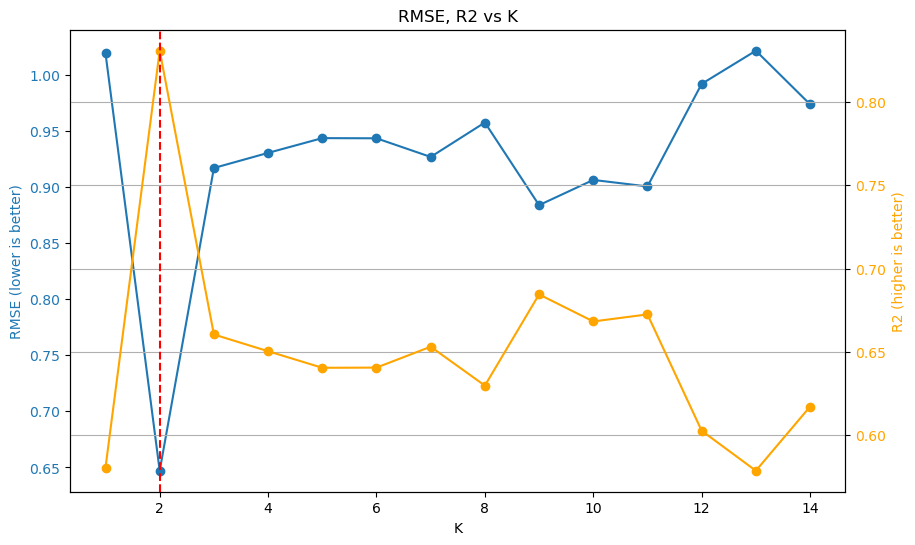

In [968]:
#visualie the results
plt.figure(figsize=(10, 6))
plt.plot(results['k'], results['RMSE'], marker='o')
plt.title('RMSE, R2 vs K')
plt.xlabel('K')
plt.ylabel('RMSE (lower is better)', color='#1f77b4')
plt.tick_params(axis='y', labelcolor='#1f77b4')
plt.twinx()
plt.plot(results['k'], results['R2'], marker='o', color='orange')
plt.ylabel('R2 (higher is better)', color='orange')
plt.tick_params(axis='y', labelcolor='orange')
plt.grid(True)
plt.axvline(x=min_rmse_r2_k, color='red', linestyle='--')
plt.show()


what this means is that using KNN we can predict inflation 9 months ahead most optimally with hyper-parameter **k=2**

In [969]:
#cross validation

#reset the selected_df
selected_df = dataset[['S&P_500_Price', 'Inflation_Rate_%']]
#shift database by 9 months
selected_df = shift_df(selected_df, 9)

#split training and testing data
X = selected_df['S&P_500_Price'].values.reshape(-1, 1)
y = selected_df['Inflation_Rate_%']

# 90% training, 10% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#cross validation (k-fold with 5 folds)
knn = KNeighborsRegressor(int(min_rmse_r2_k))
cv_scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(knn, X_train, y_train, scoring='r2')
cv_scores = np.sqrt(-cv_scores)


print(f'Cross Validation Scores (RMSE): {cv_scores}')
print(f'Cross Validation Scores (R2):   {r2_scores}')

Cross Validation Scores (RMSE): [0.71309186 0.47258156 0.79773986 0.52307849 0.90997558]
Cross Validation Scores (R2):   [0.86497969 0.93684982 0.77199443 0.87227697 0.70507211]


In [970]:
print(f'Average RMSE: {cv_scores.mean()}')
print(f'Average R2:   {r2_scores.mean()}')
print('--------------')
print(f'Variance RMSE: {cv_scores.var()}')
print(f'Variance R2:   {r2_scores.var()}')

Average RMSE: 0.683293471769517
Average R2:   0.8302346040301604
--------------
Variance RMSE: 0.027087809214937985
Variance R2:   0.006679830691906585


the RMSE is good with reasonable yet still acceptable variance

the R2 score is also pretty reliable which means this model works.

the R2 values are almost better than linear regression across the board

# Random Forest

### Parameter Tuning
* n_estimators: **50,60,70,...,140, 150**
* max_depth: None, **None, 1 - 10**
* rest are left as default

### model development procedure

* find best hyper-parameter pair
* performance validation with RMSE, R2 score (they're the go-to for regression validation)
* cross-validation to test robustness
* graph performance of parameters

In [971]:
from sklearn.ensemble import RandomForestRegressor

# Custom database

Because we're looking for independent features

In [972]:
new_dataset = new_df.copy()

selected_df2 = new_dataset[['S&P_500_Price', 'Inflation_Rate_%', 'Gold_Price', 'Crude_oil_Price', 
                            'Crude_oil_Vol_%', 'Berkshire_Vol_%','Copper_Price']]

selected_df2.shape

(61, 7)

# Test feature correlation with target

In [973]:
#function to shift the dataframe by a specified number
def shift_df(df: pd.DataFrame, shift_by: int):

    df = df.copy()
    df['S&P_500_Price'] = df['S&P_500_Price'].shift(shift_by)
    df['Gold_Price'] = df['Gold_Price'].shift(shift_by)
    df['Crude_oil_Price'] = df['Crude_oil_Price'].shift(shift_by)
    df['Copper_Price'] = df['Copper_Price'].shift(shift_by)
    if 'Crude_oil_Vol_%' in df.columns:
        df['Crude_oil_Vol_%'] = df['Crude_oil_Vol_%'].shift(shift_by)
    if 'Berkshire_Vol_%' in df.columns:
        df['Berkshire_Vol_%'] = df['Berkshire_Vol_%'].shift(shift_by)

    #drop na rows
    df.dropna(inplace=True)
    
    return df

In [974]:
# shift df by 9 months
selected_df2 = shift_df(selected_df2, 9)

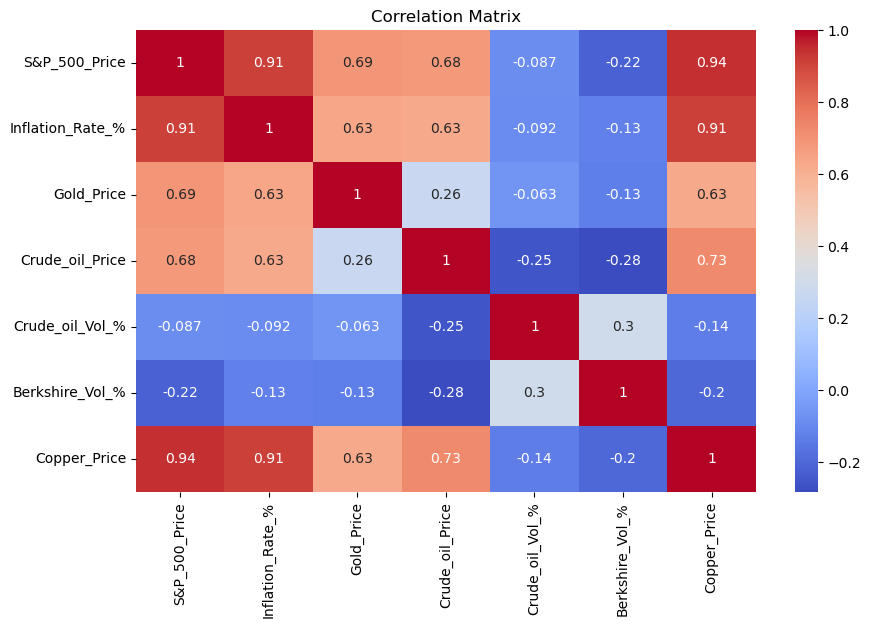

In [975]:
#test feature correlation with inflation rate
corr = selected_df2.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The uncorrelated features shouldn't cause much of an issue for random forest, but I'll try training the model with and without them then guage the performance

In [976]:
main_df = selected_df2.copy()
sub_df = selected_df2.copy().drop(['Berkshire_Vol_%', 'Crude_oil_Vol_%'], axis=1)

In [977]:
print('Main DF: ', main_df.shape)
print('Sub DF: ', sub_df.shape)

Main DF:  (52, 7)
Sub DF:  (52, 5)


# Develop Model

## with uncorrelated features

In [978]:
#split training and testing data
X = main_df[['S&P_500_Price', 'Gold_Price', 'Crude_oil_Price', 'Copper_Price', 'Crude_oil_Vol_%', 'Berkshire_Vol_%']].values
y = main_df['Inflation_Rate_%']

# 90% training, 10% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [979]:
#create a 2d table for results, rows = max_depth, columns = n_estimators
results = pd.DataFrame(columns=['max_depth', 'n_estimators', 'RMSE', 'R2'])

max_depths = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

n_estimators = [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]


In [980]:
#create model for each max_depth and n_estimators

for depth in max_depths:
    for n in n_estimators:
        #create new model with current depth and n_estimators
        rf = RandomForestRegressor(max_depth=depth, n_estimators=n, random_state=42)
        #fit the training data
        rf.fit(X_train, y_train)
        #predict the testing data
        y_pred = rf.predict(X_test)
        #calculate the RMSE
        rmse = sqrt(mean_squared_error(y_test, y_pred))
        #calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        #append the results to the dataframe
        result = {'max_depth': depth, 'n_estimators': n, 'RMSE': rmse, 'R2': r2}
        results.loc[len(results)] = result

In [981]:
results.sort_values(by=['RMSE', 'R2'], ascending=[True, False])

,max_depth,n_estimators,RMSE,R2
20,1,140,0.809837,0.735075
19,1,130,0.813503,0.732672
13,1,70,0.817425,0.730088
18,1,120,0.818304,0.729507
21,1,150,0.824743,0.725233
...,...,...,...,...
27,2,100,1.059421,0.546617
22,2,50,1.060332,0.545838
24,2,70,1.061206,0.545089
25,2,80,1.063323,0.543271


In [982]:
sorted_results = results.sort_values(by=['RMSE', 'R2'], ascending=[True, False])
top_max_depth = sorted_results.iloc[0]['max_depth']
top_n_estimators = sorted_results.iloc[0]['n_estimators']

## without uncorrelated features

In [983]:
#split training and testing data
X = sub_df[['S&P_500_Price', 'Gold_Price', 'Crude_oil_Price', 'Copper_Price']].values
y = sub_df['Inflation_Rate_%']

# 90% training, 10% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [984]:
#create a 2d table for results, rows = max_depth, columns = n_estimators
results2 = pd.DataFrame(columns=['max_depth', 'n_estimators', 'RMSE', 'R2'])

max_depths = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

n_estimators = [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

In [985]:
#create model for each max_depth and n_estimators

for depth in max_depths:
    for n in n_estimators:
        #create new model with current depth and n_estimators
        rf = RandomForestRegressor(max_depth=depth, n_estimators=n, random_state=42)
        #fit the training data
        rf.fit(X_train, y_train)
        #predict the testing data
        y_pred = rf.predict(X_test)
        #calculate the RMSE
        rmse = sqrt(mean_squared_error(y_test, y_pred))
        #calculate the R2 score
        r2 = r2_score(y_test, y_pred)
        #append the results to the dataframe
        result = {'max_depth': depth, 'n_estimators': n, 'RMSE': rmse, 'R2': r2}
        results2.loc[len(results2)] = result

In [986]:
results2.sort_values(by=['RMSE', 'R2'], ascending=[True, False])

#results2.tail(10)

,max_depth,n_estimators,RMSE,R2
17,1,110,0.835378,0.718101
20,1,140,0.838756,0.715816
19,1,130,0.844649,0.711809
16,1,100,0.850674,0.707684
18,1,120,0.851695,0.706981
...,...,...,...,...
32,2,150,1.089537,0.520475
25,2,80,1.106045,0.505834
22,2,50,1.107060,0.504927
24,2,70,1.110200,0.502114


In [987]:
sorted_results2 = results2.sort_values(by=['RMSE', 'R2'], ascending=[True, False])
top_max_depth2 = sorted_results2.iloc[0]['max_depth']
top_n_estimators2 = sorted_results2.iloc[0]['n_estimators']

# Cross-validation of both models

In [989]:
#cross validation with extra features

#split training and testing data
X = main_df[['S&P_500_Price', 'Gold_Price', 'Crude_oil_Price', 'Copper_Price', 'Crude_oil_Vol_%', 'Berkshire_Vol_%']].values
y = main_df['Inflation_Rate_%']

# 90% training, 10% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#cross validation (k-fold with 5 folds)
rf = RandomForestRegressor(max_depth=top_max_depth, n_estimators=top_n_estimators, random_state=42) #opimal values from previous results
cv_scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(rf, X_train, y_train, scoring='r2')
cv_scores = np.sqrt(-cv_scores)

print(f'Cross Validation Scores (RMSE): {cv_scores}')
print(f'Cross Validation Scores (R2):   {r2_scores}')

Cross Validation Scores (RMSE): [0.79533877 0.74259489 0.8261356  0.7843319  0.99257593]
Cross Validation Scores (R2):   [0.83203745 0.8440717  0.75547372 0.71283253 0.64909962]


In [990]:
#cross validation without extra features

#split training and testing data
X = sub_df[['S&P_500_Price', 'Gold_Price', 'Crude_oil_Price', 'Copper_Price']].values
y = sub_df['Inflation_Rate_%']

# 90% training, 10% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#cross validation (k-fold with 5 folds)
rf = RandomForestRegressor(max_depth=top_max_depth2, n_estimators=top_n_estimators2, random_state=42) #opimal values from previous results
cv_scores_2 = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error')
r2_scores_2 = cross_val_score(rf, X_train, y_train, scoring='r2')
cv_scores_2 = np.sqrt(-cv_scores_2)

print(f'Cross Validation Scores (RMSE): {cv_scores_2}')
print(f'Cross Validation Scores (R2):   {r2_scores_2}')

Cross Validation Scores (RMSE): [0.79890865 0.7615995  0.81765782 0.75545632 0.98659954]
Cross Validation Scores (R2):   [0.83052627 0.83598849 0.76046661 0.73358775 0.6533125 ]


In [991]:
#calculate the mean and variance of the RMSE and R2 scores for both models

print('Extra Features:')
print(f'Mean RMSE: {cv_scores.mean()}')
print(f'RMSE Variance: {cv_scores.var()}')
print('----------')
print(f'Mean R2: {r2_scores.mean()}')
print(f'R2 Variance: {r2_scores.var()}')

print('\nWithout Extra Features:')
print(f'Mean RMSE: {cv_scores_2.mean()}')
print(f'RMSE Variance: {cv_scores_2.var()}')
print('----------')
print(f'Mean R2: {r2_scores_2.mean()}')
print(f'R2 Variance: {r2_scores_2.var()}')


Extra Features:
Mean RMSE: 0.8281954177143355
RMSE Variance: 0.0074712428984354765
----------
Mean R2: 0.7587030032095308
R2 Variance: 0.005358637290876207

Without Extra Features:
Mean RMSE: 0.824044364852643
RMSE Variance: 0.0071400920546144065
----------
Mean R2: 0.7627763224071359
R2 Variance: 0.0045579425430488495


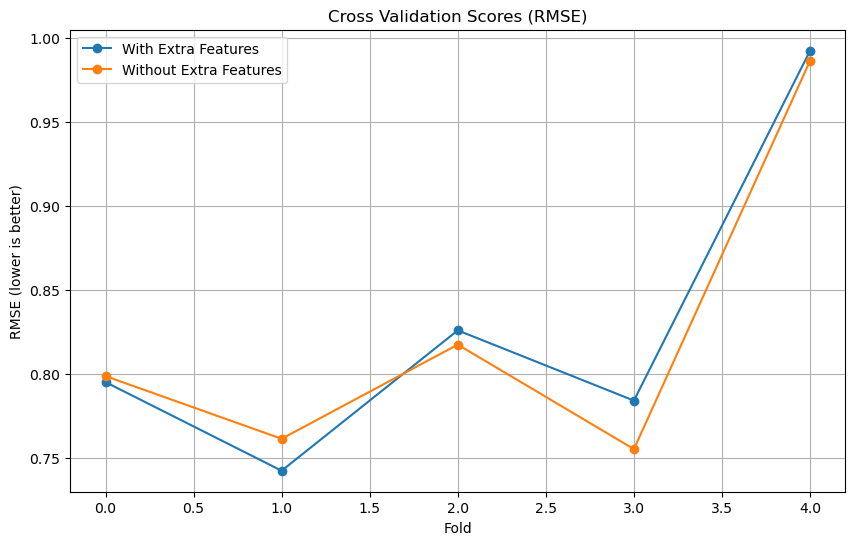

In [992]:
#graph cv_scores vs cv_scores_2
plt.figure(figsize=(10, 6))
plt.plot(cv_scores, label='With Extra Features', marker='o')
plt.plot(cv_scores_2, label='Without Extra Features', marker='o')
plt.title('Cross Validation Scores (RMSE)')
plt.xlabel('Fold')
plt.ylabel('RMSE (lower is better)')
plt.legend()
plt.grid(True)
plt.show()

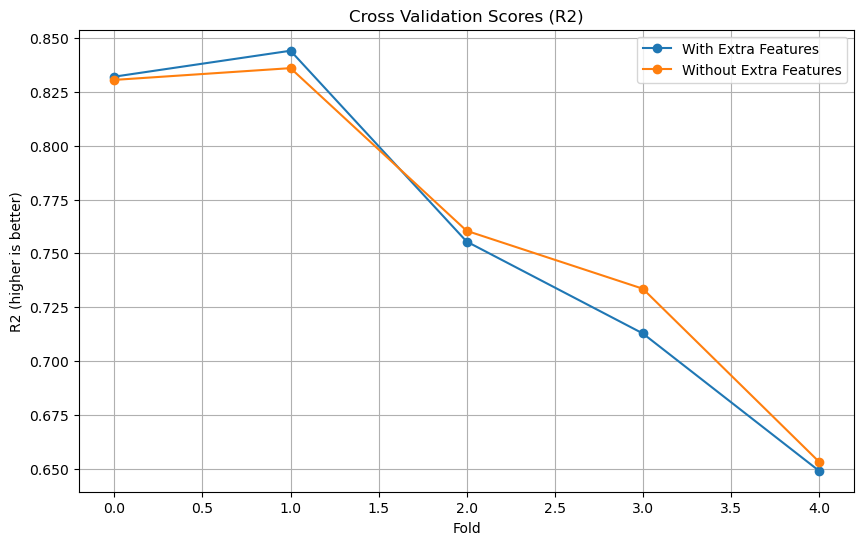

In [993]:
#compare the R2 scores
plt.figure(figsize=(10, 6))
plt.plot(r2_scores, label='With Extra Features', marker='o')
plt.plot(r2_scores_2, label='Without Extra Features', marker='o')
plt.title('Cross Validation Scores (R2)')
plt.xlabel('Fold')
plt.ylabel('R2 (higher is better)')
plt.legend()
plt.grid(True)
plt.show()